## Load & Inspect Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv('diabetic_data.csv')

# Basic info
print(df.shape)
print(df.info())
display(df.head())

(101766, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data Cleaning

### Convert data type

In [3]:
# Convert 'admission_type_id', 'discharge_disposition_id', 'admission_source_id' to categorical
categorical_cols = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
for col in categorical_cols:
    df[col] = df[col].astype('category')  
    

### Handle missing & placeholder values

In [4]:
# Replace '?' with NaN
df = df.replace('?', pd.NA)

In [5]:
# Percentage of missing values
na_df = (df.isna().sum() / len(df)) * 100
na_df.sort_values(ascending=False).head(15)

weight               96.858479
max_glu_serum        94.746772
A1Cresult            83.277322
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
encounter_id          0.000000
troglitazone          0.000000
tolbutamide           0.000000
pioglitazone          0.000000
rosiglitazone         0.000000
acarbose              0.000000
dtype: float64

### Drop irrelevant or highly missing Columns

In [6]:
# Drop columns with more than 30% missing values
col_to_drop = na_df[na_df > 30].index
df = df.drop(columns=col_to_drop)

In [7]:
# Drop irrelevant columns
irrelevant_cols = ['encounter_id']
df = df.drop(columns=irrelevant_cols)

### Impute missing values in race column

In [8]:
df['race'] = df['race'].fillna('Other')

### Drop unnecessary values in gender  and drugs column

In [9]:
# Drop unnecessary values in gender column
df = df[df['gender'] != 'Unknown/Invalid']

In [10]:
# Drop rows with NaN values in 'diag_1', 'diag_2', 'diag_3' columns
df = df.dropna(subset=['diag_1', 'diag_2', 'diag_3'])   

In [11]:
# Show the cleaned dataframe info
print(df.shape)

# Show the percentage of missing values after cleaning
na_df = (df.isna().sum() / len(df)) * 100
na_df.sort_values(ascending=False).head(15)

(100241, 44)


patient_nbr            0.0
race                   0.0
glipizide              0.0
glyburide              0.0
tolbutamide            0.0
pioglitazone           0.0
rosiglitazone          0.0
acarbose               0.0
miglitol               0.0
troglitazone           0.0
tolazamide             0.0
examide                0.0
citoglipton            0.0
insulin                0.0
glyburide-metformin    0.0
dtype: float64

### Rename columns

In [12]:
# Rename columns for better readability
df = df.rename(columns={
    'admission_type_id': 'admission_type',
    'discharge_disposition_id': 'discharge_disposition',
    'admission_source_id': 'admission_source',
    'time_in_hospital': 'hospital_stay_days',
})


### Admission Type

#### Collapse admission_type column

| **Group**         | **IDs** | **Description**                                             |
| ----------------- | ------- | ----------------------------------------------------------- |
| **Emergency**     | 1, 2, 7 | Emergency, Urgent, Trauma Center (all unplanned admissions) |
| **Elective**      | 3       | Planned admissions                                          |
| **Newborn**       | 4       | Birth-related                                               |
| **Other/Unknown** | 5, 6, 8 | Not available, NULL, not mapped                             |

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


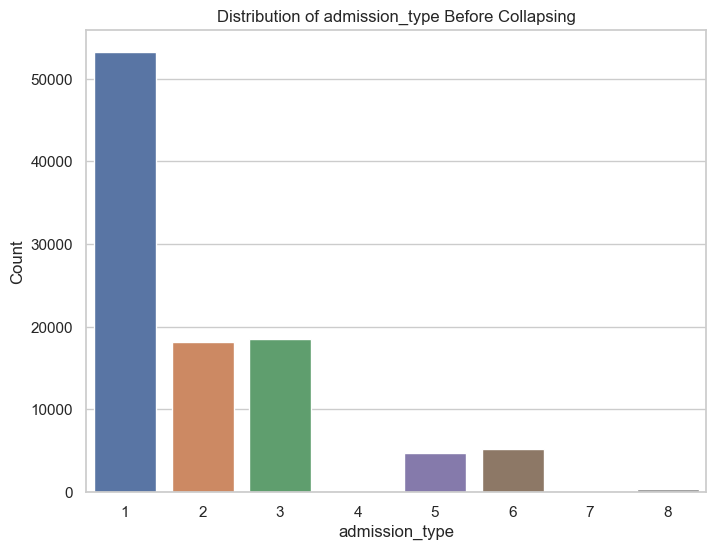

In [13]:
# Plot the distribution of admission_type before collapsing
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='admission_type')
plt.title('Distribution of admission_type Before Collapsing')
plt.xlabel('admission_type')
plt.ylabel('Count')
plt.show()


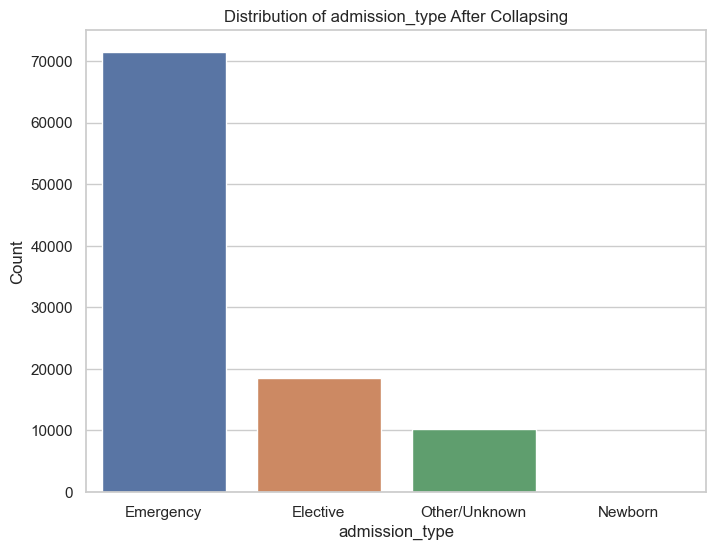

In [14]:
# Collapse admission_type categories
def collapse_admission_type(adm_id):
    if adm_id in [1, 2, 7]:
        return "Emergency"
    elif adm_id == 3:
        return "Elective"
    elif adm_id == 4:
        return "Newborn"
    else:
        return "Other/Unknown"

# Apply the collapsing function
df["admission_type"] = df["admission_type"].apply(collapse_admission_type)

# Plot the distribution of admission_type after collapsing
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='admission_type')
plt.title('Distribution of admission_type After Collapsing')
plt.xlabel('admission_type')
plt.ylabel('Count')
plt.show()

### Discharge Disposition

#### Drop expired patients 

🔹 Patients who expired during the index admission cannot be readmitted → including them would confuse the model (they’d always be labeled as “no readmission” but not for the same reason as survivors).

🔹 In this case, it's best to drop all Expired discharges.

| **Group**          | **IDs**                                                | **Description**                                                                                       |
| ------------------ | ------------------------------------------------------ | ----------------------------------------------------------------------------------------------------- |
| **Expired**        | 11, 19, 20, 21                                         | Patient died (home, medical facility, or unknown)                                                     |

In [15]:
# Remove expired patients
expired_ids = [11, 19, 20, 21]
df = df[~df['discharge_disposition'].isin(expired_ids)]

#### Collapse discharge_disposition column

| **Group**          | **IDs**                                                | **Description**                                                                                       |
| ------------------ | ------------------------------------------------------ | ----------------------------------------------------------------------------------------------------- |
| **Home**           | 1                                                      | Discharged to home                                                                                    |
| **Home Health**    | 6, 8                                                   | Discharged to home with home health services or home IV provider                                      |
| **Transfer**       | 2, 3, 4, 5, 10, 15, 16, 17, 22, 23, 24, 27, 28, 29     | Discharged/transferred to another hospital, SNF, ICF, rehab, psych, CAH, or other institutions        |
| **Hospice**        | 13, 14                                                 | Discharged to hospice care (home or medical facility)                                                 |
| **Other/Unknown**  | 7, 9, 12, 18, 25, 26                                   | AMA (against medical advice), still inpatient, admitted as inpatient, missing, invalid, or not mapped |


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


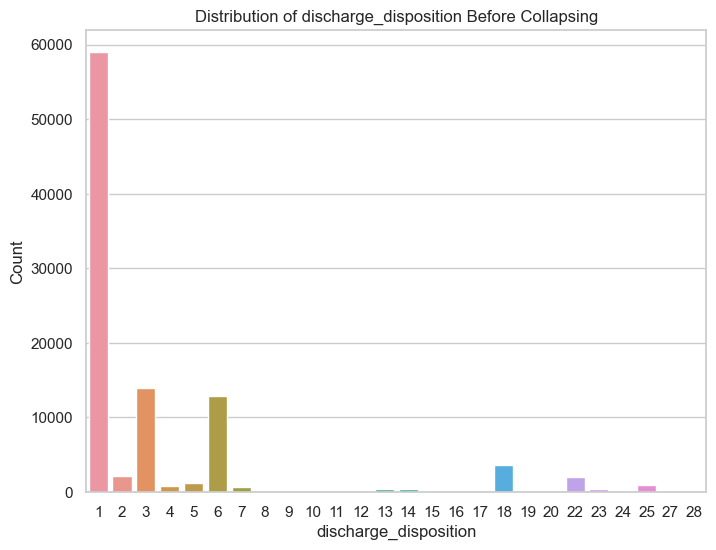

In [16]:
# Plot the distribution of discharge_disposition before collapsing
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='discharge_disposition')
plt.title('Distribution of discharge_disposition Before Collapsing')
plt.xlabel('discharge_disposition')
plt.ylabel('Count')
plt.show()

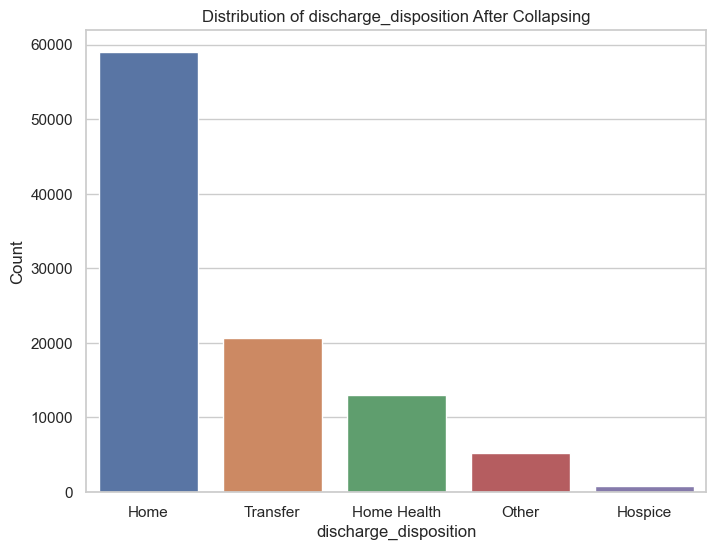

In [17]:
# Collapse discharge_disposition categories
def collapse_discharge(discharge_id):
    if discharge_id in [1]:
        return 'Home'
    elif discharge_id in [6, 8]:
        return 'Home Health'
    elif discharge_id in [2, 3, 4, 5, 10, 15, 16, 17, 22, 23, 24, 27, 28, 29]:
        return 'Transfer'
    elif discharge_id in [13, 14]:
        return 'Hospice'
    else:
        return 'Other'
    
# Apply the collapsing function
df['discharge_disposition'] = df['discharge_disposition'].apply(collapse_discharge)

# Plot the distribution of discharge_disposition after collapsing
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='discharge_disposition')
plt.title('Distribution of discharge_disposition After Collapsing')
plt.xlabel('discharge_disposition')
plt.ylabel('Count')
plt.show()

### Admission Source

#### Collapse admission_source column

| **Group**            | **IDs**                     | **Description**                                                    |
| -------------------- | --------------------------- | ------------------------------------------------------------------ |
| **Referral**         | 1, 2, 3                     | Physician, clinic, HMO                                             |
| **Transfer**         | 4, 5, 6, 10, 18, 22, 25, 26 | Hospital, SNF, health facility, home health, hospice, ASC          |
| **Emergency Room**   | 7                           | ER admissions                                                      |
| **Newborn/Delivery** | 11, 12, 13, 14, 23, 24      | Births (normal, premature, sick baby, extramural, in/out hospital) |
| **Other/Unknown**    | 8, 9, 15, 17, 19, 20, 21    | Court/law, missing, invalid, not mapped                            |


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


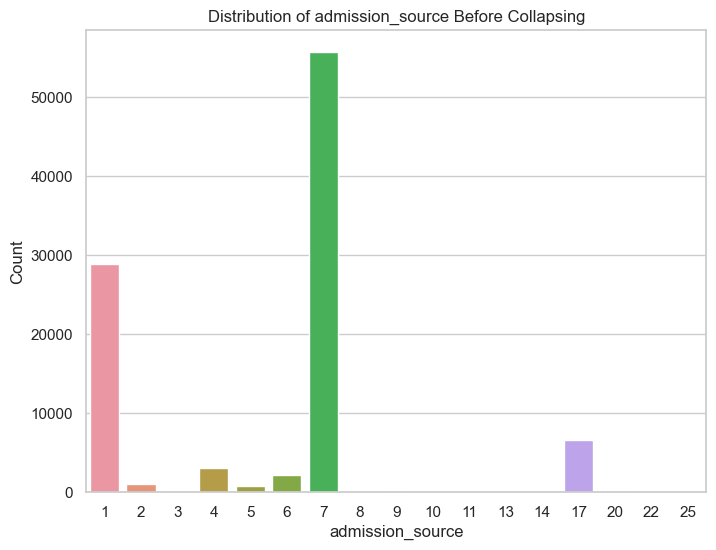

In [18]:
# Plot the distribution of discharge_disposition
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='admission_source')
plt.title('Distribution of admission_source Before Collapsing')
plt.xlabel('admission_source')
plt.ylabel('Count')
plt.show()

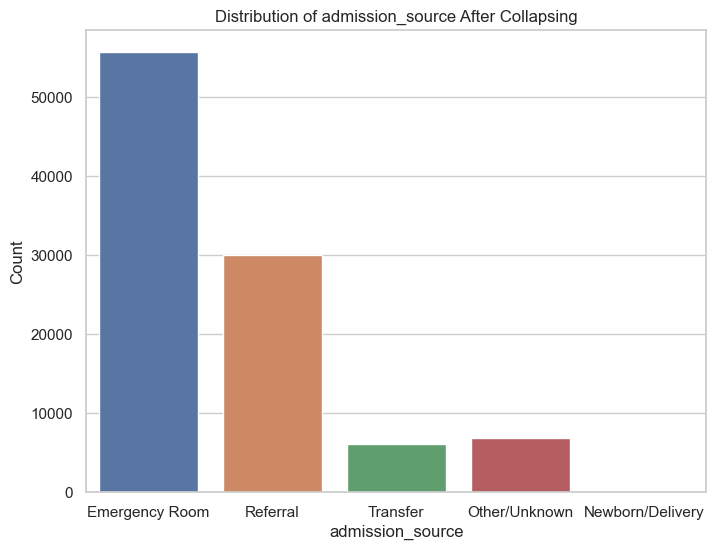

In [19]:
# Collapse discharge_disposition categories
def collapse_admission_source(source_id):
    if source_id in [1, 2, 3]:
        return 'Referral'
    elif source_id in [4, 5, 6, 10, 18, 22, 25, 26]:
        return 'Transfer'
    elif source_id == 7:
        return 'Emergency Room'
    elif source_id in [11, 12, 13, 14, 23, 24]:
        return 'Newborn/Delivery'
    else:
        return 'Other/Unknown'
    
# Apply the collapsing function
df['admission_source'] = df['admission_source'].apply(collapse_admission_source)

# Plot the distribution of discharge_disposition after collapsing
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='admission_source')
plt.title('Distribution of admission_source After Collapsing')
plt.xlabel('admission_source')
plt.ylabel('Count')
plt.show()

## Feature Engineering

### Transformation to binary

The readmission column in the UCI hospital dataset has 3 classes:
- (NO): the patient was not readmitted within 30 days or after 30 days 

- (<30): the patient was readmitted within 30 days 

- (>30): the patient was readmitted after 30 days

🔹 Collapsing it into a **binary** classification problem is widely used because hospitals are especially concerned with 30-day readmission penalties.

- <30 → 1 (positive: readmitted)
- NO and >30 → 0 (negative: not early readmission)

In [20]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [21]:
df['readmitted'].value_counts()

readmitted
0    87341
1    11250
Name: count, dtype: int64

### Categorize diagnosis codes

In [22]:
def map_icd9_to_category(code):
    try:
        code = str(code)
        if code.startswith('E') or code.startswith('V'):
            return 'Other'
        num = int(float(code))  # convert to number safely

        if 390 <= num <= 459 or num == 785:
            return 'Circulatory'
        elif 460 <= num <= 519 or num == 786:
            return 'Respiratory'
        elif 520 <= num <= 579 or num == 787:
            return 'Digestive'
        elif num == 250:
            return 'Diabetes'
        elif 800 <= num <= 999:
            return 'Injury'
        elif 710 <= num <= 739:
            return 'Musculoskeletal'
        elif 580 <= num <= 629 or num == 788:
            return 'Genitourinary'
        elif 140 <= num <= 239:
            return 'Neoplasms'
        else:
            return 'Other'
    except:
        return 'Other'


In [23]:
# Apply the mapping function to diag_1, diag_2, diag_3
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].apply(map_icd9_to_category)

### Create num_chronic_conditions column

In [24]:
# Count how many of the three diagnosis categories are not 'Other'
df['num_chronic_conditions'] = df[['diag_1', 'diag_2', 'diag_3']].apply(lambda x: sum(cat != 'Other' for cat in x), axis=1)

In [25]:
# Show the dataframe with new features
display(df.head())

,patient_nbr,race,gender,age,admission_type,discharge_disposition,admission_source,hospital_stay_days,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,num_chronic_conditions
1,55629189,Caucasian,Female,[10-20),Emergency,Home,Emergency Room,3,59,0,18,0,0,0,Other,Diabetes,Other,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,1
2,86047875,AfricanAmerican,Female,[20-30),Emergency,Home,Emergency Room,2,11,5,13,2,0,1,Other,Diabetes,Other,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,1
3,82442376,Caucasian,Male,[30-40),Emergency,Home,Emergency Room,2,44,1,16,0,0,0,Other,Diabetes,Circulatory,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,2
4,42519267,Caucasian,Male,[40-50),Emergency,Home,Emergency Room,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,3
5,82637451,Caucasian,Male,[50-60),Emergency,Home,Referral,3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0,3


In [26]:
# Save the cleaned dataframe to a new CSV file
df.to_csv('diabetic_data_cleaned.csv', index=False) 
